# Step 1 | Importing libraries

In [ ]:
#from google.colab import drive

In [ ]:
#drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pip install split-folders

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout

# importing dataset
import pathlib

import splitfolders

# visualization
import matplotlib.pyplot as plt
import numpy as np


# Step 2 | Preparing Data

In [ ]:
#root_path = "/content/drive/MyDrive/rice images/photos"
root_path = "Rice_Image_Dataset"
root_path = pathlib.Path(root_path)

In [ ]:
# splitting data into Train, Test and Validation
splitfolders.ratio(input=root_path, output='rice_images', seed=42, ratio=(0.7, 0.15, 0.15))

In [ ]:
Train = keras.utils.image_dataset_from_directory(
    directory="rice_images/train",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(256,256))


Test = keras.utils.image_dataset_from_directory(
    directory="rice_images/test",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(256,256))


Validation = keras.utils.image_dataset_from_directory(
    directory="rice_images/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(256,256))

Found 38921 files belonging to 5 classes.
Found 8343 files belonging to 5 classes.
Found 8339 files belonging to 5 classes.


In [ ]:
# Let's check class names
print(Train.class_names)
print(Test.class_names)
print(Validation.class_names)

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


In [ ]:
# let's see a random image and its label
train_iter = iter(Train)
image, label = next(train_iter)

image.shape, label  # the shape of the image is [32, 256, 256] and it belongs to class 2 which is "Ipsala".

(torch.Size([32, 256, 256]), 2)


# Step 3 | Building Neural Network Models

# Model 1

In [ ]:
# Creating CNN model using one conv layer + one pooling layer + two dense layer. Also the activation function is ReLU.

cnn1 = tf.keras.models.Sequential()

cnn1.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=[256,256,3]))
cnn1.add(MaxPool2D(pool_size=2, strides=2))
cnn1.add(Flatten())
cnn1.add(Dense(units=512, activation="relu"))
cnn1.add(Dense(units=5, activation="relu"))

# summary
cnn1.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 516128)            0         
                                                                 
 dense_2 (Dense)             (None, 512)               264258048 
                                                                 
 dense_3 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 264,261,509
Trainable params: 264,261,509
Non-trainable params: 0
________________________________________

In [ ]:
# Training the model
cnn1.compile(optimizer="adam", loss="binary_crossentropy", metrics="accuracy")
model1 = cnn1.fit(x=Train, validation_data= Validation, epochs=3)

Epoch 1/3
1217/1217 [==============================] - 119s 96ms/step - loss: 6.3623 - accuracy: 0.1891 - val_loss: 6.3623 - val_accuracy: 0.1890
Epoch 2/3
1217/1217 [==============================] - 115s 94ms/step - loss: 6.3623 - accuracy: 0.1891 - val_loss: 6.3623 - val_accuracy: 0.1890
Epoch 3/3
1217/1217 [==============================] - 120s 98ms/step - loss: 6.3623 - accuracy: 0.1891 - val_loss: 6.3623 - val_accuracy: 0.1890


In [ ]:
# plot for accuracy
def accuracy_plot(model):
  line1 = plt.plot(model.history["accuracy"], marker="o")
  line2 = plt.plot(model.history["val_accuracy"], marker="h")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend(["Train", "test"])
  plt.show()


# plot for loss
def loss_plot(model):
  line1 = plt.plot(model.history["loss"], marker="o")
  line2 = plt.plot(model.history["val_loss"], marker="h")
  plt.xlabel("Epochs")
  plt.ylabel("loss")
  plt.legend(["Train", "test"])
  plt.show()

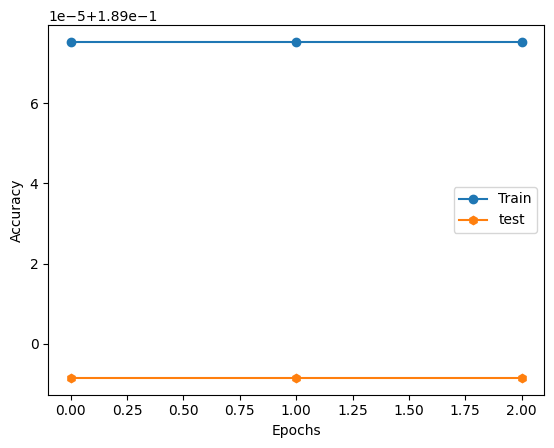

In [ ]:
accuracy_plot(model1)

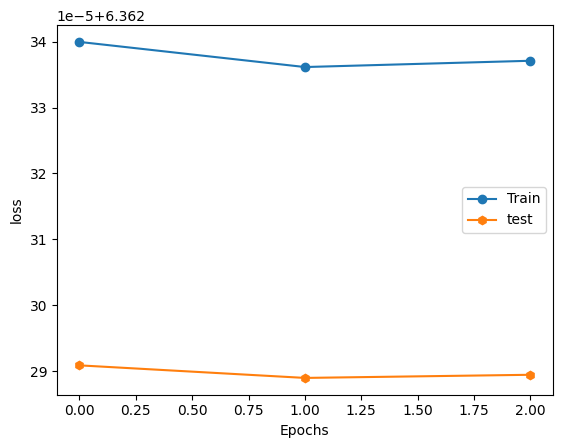

In [ ]:
loss_plot(model1)

# Model 2

In [ ]:
# cnn model (regularization, sigmoid activation and dropout layer, were added)
cnn2 = tf.keras.models.Sequential()

cnn2.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=[256,256,3], kernel_regularizer="l2"))
cnn2.add(MaxPool2D(pool_size=2, strides=2))
cnn2.add(Flatten())
cnn2.add(Dense(units=512, activation="relu", kernel_regularizer="l2" ))
cnn2.add(Dropout(0.5))
cnn2.add(Dense(units=5, activation="softmax", kernel_regularizer="l2"))

# Summary
cnn2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 516128)            0         
                                                                 
 dense (Dense)               (None, 512)               264258048 
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                        

In [ ]:
cnn2.compile(optimizer="adam", loss="CategoricalCrossentropy", metrics="accuracy")
model2 = cnn2.fit(x=Train, validation_data=Validation, epochs=5)

Epoch 1/5
1217/1217 [==============================] - 146s 117ms/step - loss: 60.0245 - accuracy: 0.8988 - val_loss: 4.6370 - val_accuracy: 0.9716
Epoch 2/5
1217/1217 [==============================] - 141s 116ms/step - loss: 3.1775 - accuracy: 0.9001 - val_loss: 1.9673 - val_accuracy: 0.9608
Epoch 3/5
1217/1217 [==============================] - 142s 116ms/step - loss: 1.6300 - accuracy: 0.8982 - val_loss: 1.4107 - val_accuracy: 0.9183
Epoch 4/5
1217/1217 [==============================] - 140s 115ms/step - loss: 1.4376 - accuracy: 0.8949 - val_loss: 1.1421 - val_accuracy: 0.9801
Epoch 5/5
1217/1217 [==============================] - 138s 113ms/step - loss: 1.3819 - accuracy: 0.8961 - val_loss: 1.5388 - val_accuracy: 0.9418


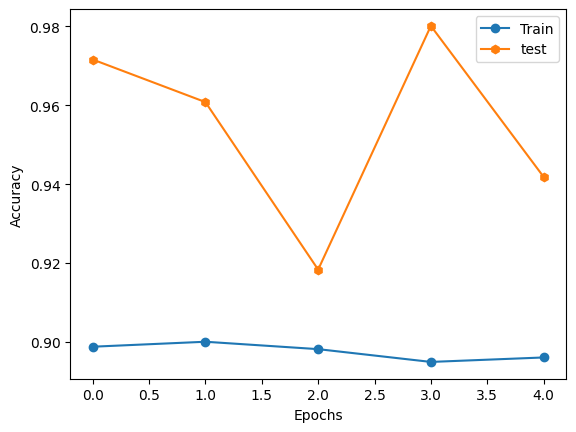

In [ ]:
accuracy_plot(model2)

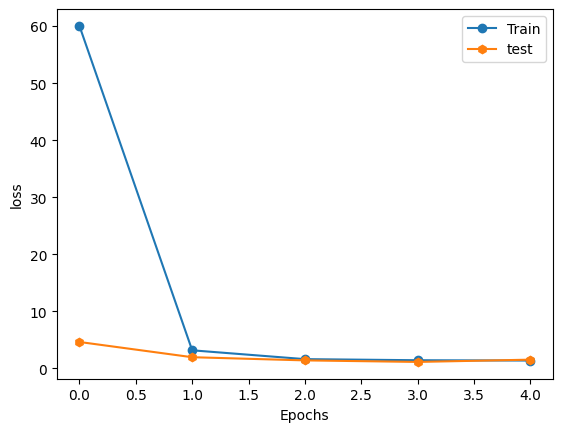

In [ ]:
loss_plot(model2)

# Step 4 |  Saving the best model

In [ ]:
# choosing the best model
best_model = cnn2

# saving the best model
best_model.save("CNN_Model.h5")